<a href="https://colab.research.google.com/github/Jhansipothabattula/Machine_Learning/blob/main/Day19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correlation and Regression Analysis

**Understanding Correlation**

- What is Correlation?

  - Measure the Strength and direction of the relationship between two variables

  - Values range from -1 to 1 with 0 including no correlation

- Types of Correlation

  - Pearson Correlation Coefficient(r)

  - Spearman Correlation Coefficient(p)

In [ ]:
import numpy as np
from scipy.stats import pearsonr, spearmanr

x = np.array([1, 2, 3, 4, 5])
y = np.array([6, 7, 8, 9, 10])

# Pearson correlation
r, _ = pearsonr(x, y)
print("Pearson Correlation Coefficient: \n", r)

# Spearman correlation
rho, _ = spearmanr(x, y)
print("Speraman Correlation Coefficient: \n", rho)

Pearson Correlation Coefficient: 
 1.0
Speraman Correlation Coefficient: 
 0.9999999999999999


**Linear Regression Basics**

- what is Linear Regression?

 - Method to model the relationship between a dependent variable(y) and one or more independent variables(x)

 - formula for Simple Linear Regression:

   y = β₀ + β₁x + ε

   where Linear Regression Key metrics

   β₀: Intercept

   β₁: Slope

   R^2: R-Squared

   ε: Error term


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Smaple Data
x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 5, 8, 10])

# Fit Linear Regresssion Paramters
model = LinearRegression()
model.fit(x, y)
print("Slope: \n", model.coef_[0])
print("Intercept: \n", model.intercept_)
print("R-Squared: \n", model.score(x, y))

Slope: 
 2.0
Intercept: 
 -0.20000000000000018
R-Squared: 
 0.9803921568627451


**Interpreting Regression Results**

- slope

  - Indicates the magnitude and direction of the relationship

- Intecept

  - Starting point of the regression line

- R-Squared(R^2)

  - Closer to 1 indicates better fit

**Exercise 1 :- Claculate correlation between Features**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving iris.csv.txt to iris.csv.txt


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


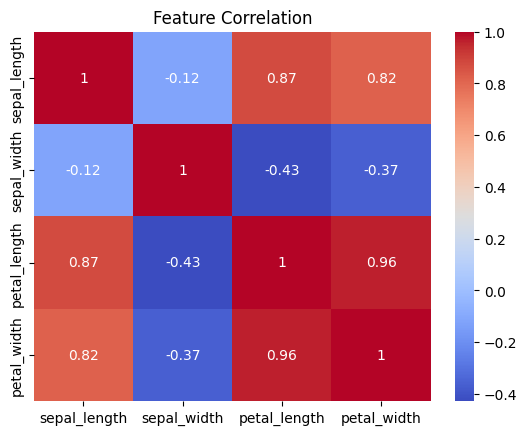

In [ ]:
df = pd.read_csv("iris.csv.txt")
df.info()
del df["species"]

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot Heatmap
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")
plt.title("Feature Correlation")
plt.show()

**Exercise 2 :- Fit a simple Linear Regresssion Model**

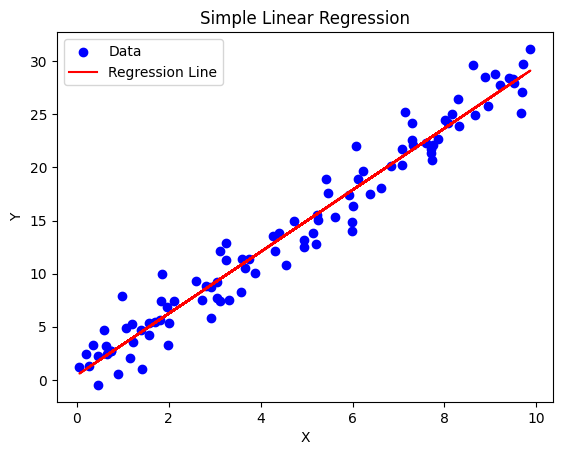

In [ ]:
import numpy as np
import pandas as pd

# Generate Data
np.random.seed(42)
x = np.random.rand(100, 1) * 10
y = 3 * x + np.random.randn(100, 1) * 2

# fit Linear Rgression
model = LinearRegression()
model.fit(x, y)

# Get Coefficients
slope = model.coef_[0][0]
intercept = model.intercept_[0]
r_squared = model.score(x, y)

# Visualize
plt.scatter(x, y, color = "blue", label = "Data")
plt.plot(x, model.predict(x), color = "red", label = "Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

**Additional Practice**
>1. Fit a multiple Linear Regression model with multiple independent variables

Multiple Linear Regression
Intercept : 
 -0.260552859172126
Coefficients : 
 [ 4.37726534  1.98755067 -0.50917735]
MSE : 
 25.905628413964244
R² Score : 
 0.9489139452514516


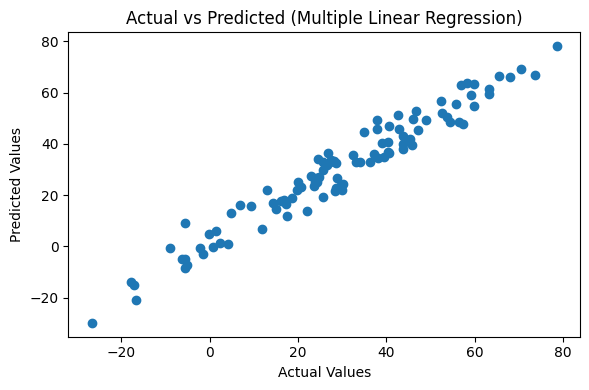

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create synthetic dataset
np.random.seed(42)
n = 500

# Multiple independent variables
X1 = np.random.normal(5, 1, n)      # Feature 1
X2 = np.random.normal(30, 10, n)    # Feature 2
X3 = np.random.normal(100, 20, n)   # Feature 3

# Stack features into X matrix
X = np.column_stack([X1, X2, X3])

# Target variable (linear relationship)
y = 4*X1 + 2*X2 - 0.5*X3 + np.random.normal(0, 5, n)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Fit Multiple Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Multiple Linear Regression")
print("Intercept : \n", model.intercept_)
print("Coefficients : \n", model.coef_)
print("MSE : \n", mse)
print("R² Score : \n", r2)

# Plot Actual vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Multiple Linear Regression)")
plt.tight_layout()
plt.show()

> 2.Compare correlation and Regression results for non-linear Relationships

Correlation: 
 0.017152362445772094
Linear Regression MSE: 
 59.47641225436023


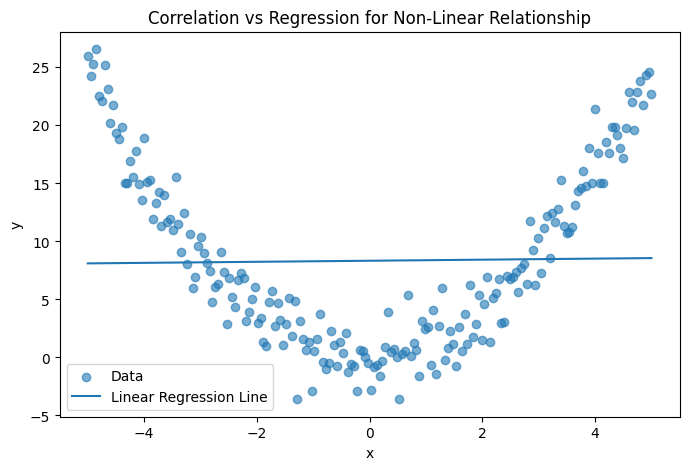

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Synthetic Non-Linear Data
np.random.seed(42)
x = np.linspace(-5, 5, 200)
y = x**2 + np.random.normal(0, 2, 200)   # Non-linear relationship

X = x.reshape(-1, 1)

# 1. Correlation (Linear Only)
corr = np.corrcoef(x, y)[0, 1]
print("Correlation: \n", corr)

# 2. Linear Regression
model = LinearRegression()
model.fit(X, y)
pred = model.predict(X)

mse = mean_squared_error(y, pred)
print("Linear Regression MSE: \n", mse)

# 3. Plot
plt.figure(figsize=(8,5))
plt.scatter(x, y, label="Data", alpha=0.6)
plt.plot(x, pred, label="Linear Regression Line")
plt.title("Correlation vs Regression for Non-Linear Relationship")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

> 3.Use real-world datasets(Ex: Housing prices)for Regression analysis

Dataset shape: (20640, 8)

First few rows of data:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Model Performance:
MSE: 0.5558915986952444
R² Score: 0.5757877060324508

Feature Importance:
      Feature  Coefficient
7   Longitude    -0.433708
6    Latitude    -0.419792
2    AveRooms    -0.123323
5    AveOccup    -0.003526
4  Population    -0.000002
1    HouseAge     0.009724
0      MedInc     0.448675
3   AveBedrms     0.783145


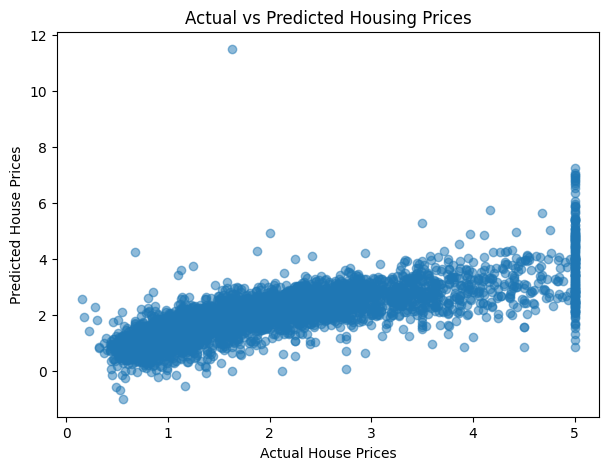

In [6]:
# Real-World Regression Analysis using California Housing Dataset

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load Dataset
data = fetch_california_housing()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target     # Median house prices

print("Dataset shape:", X.shape)
print("\nFirst few rows of data:")
print(X.head())

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predictions
y_pred = model.predict(X_test)

# 5. Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("MSE:", mse)
print("R² Score:", r2)

# 6. Feature Importance (Coefficients)
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values("Coefficient")

print("\nFeature Importance:")
print(coef_df)

# 7. Plot: Actual vs Predicted Prices
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted Housing Prices")
plt.show()